# Hypothesis testing workflow

You've seen the hypothesis testing workflow for the one sample case where you compared a sample mean to a hypothesized value, and the two sample case where you compared two sample means. In both cases, the workflow shares common steps.

<center><img src="images/02.01.png"  style="width: 400px, height: 300px;"/></center>

# Two sample mean test statistic

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t". 
While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The `late_shipments` dataset has been split into a "`yes`" group, where `late == "Yes"` and a "`no`" group where `late == "No"`. The weight of the shipment is given in the `weight_kilograms` variable

In [5]:
import pandas as pd
import numpy as np
late_shipments = pd.read_feather("dataset/late_shipments.feather")

# Calculate the numerator of the test statistic
yes = late_shipments[late_shipments["late"] == "Yes"]["weight_kilograms"]
no = late_shipments[late_shipments["late"] == "No"]["weight_kilograms"]
xbar_yes = yes.mean()
xbar_no = no.mean()
s_yes = yes.std()
s_no = no.std()
numerator = xbar_yes - xbar_no
n_yes = len(yes)
n_no = len(no)
# Calculate the denominator of the test statistic
denominator = np.sqrt(s_yes**2 /n_yes + s_no**2 /n_no )

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

2.3936661778766433


In [4]:
late_shipments.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

# Why is t needed?

The process for calculating p-values is to start with the sample statistic, standardize it to get a test statistic, then transform it via a cumulative distribution function. In Chapter 1, that final transformation was denoted 
, and the CDF transformation used the (standard normal) z-distribution. In the last video, the test statistic was denoted 
, and the transformation used the t-distribution.

In which hypothesis testing scenario is a t-distribution needed instead of the z-distribution?

- When a sample standard deviation is used in estimating a standard error.

# The t-distribution

The t-distribution is used to calculate the p-value from the 
 test statistic, and having a sense of how the PDF and CDF look can help you understand this calculation. It has two parameters: the degrees of freedom, and the non-centrality parameter.

The plots show the PDF and CDF for a t-distribution (solid black line), and for comparison show a standard normal distribution with mean 0 and variance 1 (gray dotted line).

Which statement about the the t-distribution is true?

- As you increase the degrees of freedom, the t-distribution PDF and CDF curves get closer to those of a normal distribution.

# From t to p

Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (`late == "No"`) compared to shipments that were late (`late == "Yes"`). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

H0: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

HA: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, `t_stat`, is available, as are the samples sizes for each group, `n_no` and `n_yes`. Use a significance level of `alpha = 0.05`.

- It is a left-tailed t-test

In [13]:
from scipy.stats import t
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes -2
t_stat = -2.3936661778766433
# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)
significance = 0.05
if p_value< significance:
  print("Reject the null")
else:
    print("Fail to reject the null")

0.008432382146249523
Reject the null


# Is pairing needed?

t-tests are used to compare two sample means. However, the test involves different calculations depending upon whether the two samples are paired or not. To make sure you use the correct version of the t-test, you need to be able to identify pairing.

<center><img src="images/02.02.png"  style="width: 400px, height: 300px;"/></center>


# Visualizing the difference

Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, `sample_dem_data`. Since the counties are the same in both years, these samples are paired. The columns containing the samples are `dem_percent_12` and `dem_percent_16`.

In [14]:
sample_dem_data = pd.read_feather("dataset/dem_votes_potus_12_16.feather")
sample_dem_data.columns

Index(['state', 'county', 'dem_percent_12', 'dem_percent_16'], dtype='object')

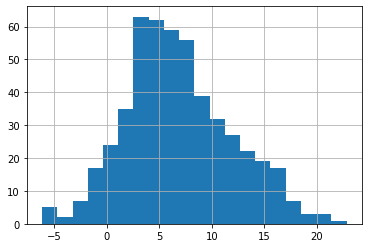

In [16]:
import matplotlib.pyplot as plt
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data["dem_percent_12"] - sample_dem_data["dem_percent_16"]

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist( bins = 20)
plt.show()

# Using ttest()

Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the `pingouin` Python package has a `.ttest()` method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

H0: The proportion of democratic votes in 2012 and 2016 were the same. 
HA: The proportion of democratic votes in 2012 and 2016 were different.

In [18]:
# import pingouin
# # Conduct a t-test on diff
# test_results = pingouin.ttest(x=sample_dem_data['diff'],
#                y=0,
#                paired=False,
#                alternative="two-sided")

# # Print the test results
# print(test_results)

In [20]:

# # Conduct a paired t-test on dem_percent_12 and dem_percent_16
# paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
#                               y=sample_dem_data['dem_percent_16'],
#                               paired = True, 
#                               alternative="two-sided")

# # Print the paired test results
# print(paired_test_results)

# Visualizing many categories

So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (`pack_price`) varies between the three shipment modes (`shipment_mode`): "`Air`", "`Air Charter`", and "`Ocean`"

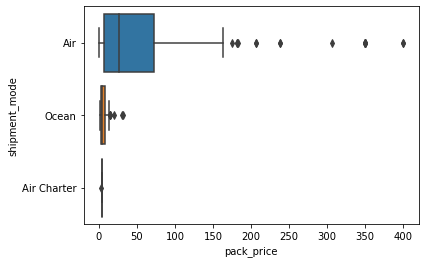

In [21]:
import seaborn as sns
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot( data = late_shipments,
            y = "shipment_mode",
            x = "pack_price")
plt.show()

# Conducting an ANOVA test

The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

H0: Pack prices for every category of shipment mode are the same.

HA: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

In [23]:
# # Run an ANOVA for pack_price across shipment_mode
# anova_results = pingouin.anova(data=late_shipments,
#                dv="pack_price",
#                between="shipment_mode")

# # Print anova_results
# print(anova_results)

# Pairwise t-tests

The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

In [24]:
# # Modify the pairwise t-tests to use Bonferroni p-value adjustment
# pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
#                                            dv="pack_price",
#                                            between="shipment_mode",
#                                            padjust="bonf")

# # Print pairwise_results
# print(pairwise_results)